<div style="text-align: center;">
   <img src="Images/Lisbon.jpg" alt="Description" width="1100"/>
</div>

<h1 id = "imports" style="font-size: 30px; color: #5e6670;"><strong>1. Imports</strong></h1>

In [88]:
import requests
import sys
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import math
import zipfile
import io
import matplotlib.cm as cmap
from matplotlib.colors import ListedColormap
from geopandas import GeoDataFrame
from geopandas.tools import sjoin
from shapely.geometry import Point

<h1 id = "imports" style="font-size: 30px; color: #5e6670;"><strong>2. Imports Final Datasets</strong></h1>

In [89]:
Lisbon_Properties = pd.read_csv('Lisbon_Properties_Final.csv', index_col=0)
Lisbon_Properties.head()

,id,Title,Price,N_Rooms,Total_Area,Latitude,Longitude,Region,extras,Type,...,Estúdio.1,Flat.1,Loft.1,Moradia.1,Palacete.1,Penthouse.1,Quinta.1,Stations_within_0.5km,Cultural_fac_within_1.5km,Edu_within_1.5km
0,0,"Apartamento T2 em Alvalade, Lisboa",430000,2,Área bruta 90 m²,38.75,-9.14,Alvalade,,Apartamento,...,0,0,0,0,0,0,0,1,42,45
1,1,"Apartamento T1 em Benfica, Lisboa",269900,1,Área bruta 97 m²,38.75,-9.20,Benfica,,Apartamento,...,0,0,0,0,0,0,0,0,8,17
2,2,"Apartamento T3 na Rua António Nobre, São Domin...",399900,3,Área bruta 120 m²,38.75,-9.18,São_Domingos_de_Benfica,,Apartamento,...,0,0,0,0,0,0,0,1,16,23
3,3,"Apartamento T2 na Rua de São Pedro Mártir, San...",285000,2,Área bruta 55 m²,38.71,-9.14,Santa_Maria_Maior,,Apartamento,...,0,0,0,0,0,0,0,2,96,27
4,4,"Apartamento T1 em Praça de Luís de Camões, Mis...",690000,1,Área bruta 93 m²,38.71,-9.14,Misericórdia,Com garagem,Apartamento,...,0,0,0,0,0,0,0,2,106,28


In [90]:
Lisbon_Metro = pd.read_csv('Lisbon_Metro_Final.csv', index_col=0)
Lisbon_Metro.head()

,Nome,Outros nomes,Linha,Lat.,Long.,Nome_Concat
0,Aeroporto,—,Vermelha,38.77,-9.13,Aeroporto - —
1,Alameda,Alameda I (técn.),Verde,38.74,-9.13,Alameda - Alameda I (técn.)
2,Alameda,Alameda II (técn.),Vermelha,38.74,-9.13,Alameda - Alameda II (técn.)
3,Alfornelos,—,Azul,38.76,-9.20,Alfornelos - —
4,Alto dos Moinhos,Centro Administrativo (prev.),Azul,38.75,-9.18,Alto dos Moinhos - Centro Administrativo (prev.)


In [91]:
Lisbon_Culture = pd.read_csv('Lisbon_Culture_Final.csv', index_col=0)
Lisbon_Metro.head()

,Nome,Outros nomes,Linha,Lat.,Long.,Nome_Concat
0,Aeroporto,—,Vermelha,38.77,-9.13,Aeroporto - —
1,Alameda,Alameda I (técn.),Verde,38.74,-9.13,Alameda - Alameda I (técn.)
2,Alameda,Alameda II (técn.),Vermelha,38.74,-9.13,Alameda - Alameda II (técn.)
3,Alfornelos,—,Azul,38.76,-9.20,Alfornelos - —
4,Alto dos Moinhos,Centro Administrativo (prev.),Azul,38.75,-9.18,Alto dos Moinhos - Centro Administrativo (prev.)


In [92]:
Lisbon_Education = pd.read_csv('Lisbon_Education_Final.csv', index_col=0)
Lisbon_Education.head()

,Name,Area,GlobalID,geometry,Access,Stage,latitude,longitude
0,Escola Profissional Metropolitana de Lisboa,Alcântara,707e37d5-e1b5-45fc-85f8-cc7095308431,POINT (-9.181589977153561 38.699297532228),Public,Pre-School,38.70,-9.18
1,Conservatório Metropolitano de Música de Lisboa,Alcântara,83edfbca-6558-460e-93d1-0475467960a1,POINT (-9.1813018524282 38.6993993202234),Public,Pre-School,38.70,-9.18
2,Academia de Música de Luisboa - Os Violinos,Belém,a421d20f-eb13-4126-a30c-2158b07fe2fd,POINT (-9.1944372593028 38.7001317342682),Public,Pre-School,38.70,-9.19
3,Acordarte - Academia de Música de Lisboa,Belém,24aa8435-1660-4cdd-a993-5113daefd230,POINT (-9.1944372593028 38.7001317342682),Public,Pre-School,38.70,-9.19
4,Escola Profissional de Imagem (ETIC),Misericórdia,049de07d-4405-4a0f-8946-4ddce0c71d28,POINT (-9.147457132489089 38.7078031160822),Public,Pre-School,38.71,-9.15


<h1 id = "imports" style="font-size: 30px; color: #5e6670;"><strong>3. General Data</strong></h1>

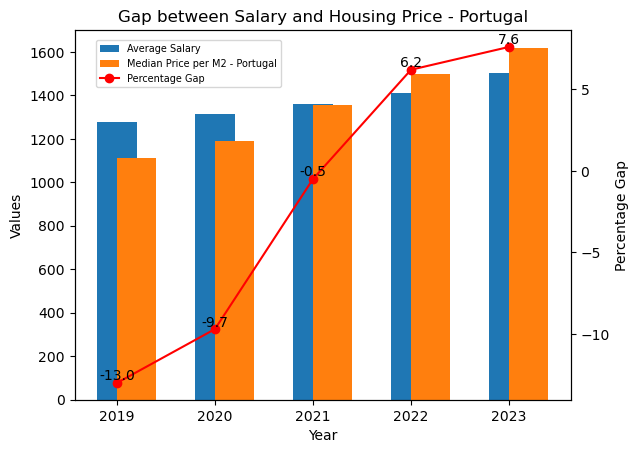

In [93]:
data_ine = {
    'Year': ['2019', '2020', '2021', '2022', '2023'],
    'Average Salary': [1277, 1315, 1362, 1412, 1505],
    'Median Price per M2 - Lisbon': [1858, 2000, 2281, 2537, 2728],
    'Median Price per M2 - Portugal': [1111, 1188, 1355, 1500, 1619],
    'Percentage Gap - Lisbon': [45.5, 52.1, 67.5, 79.7, 81.3],
    'Percentage Gap - Portugal': [-13.0, -9.7, -0.5, 6.2, 7.6],
}

df = pd.DataFrame(data_ine)
fig, ax1 = plt.subplots()

ax1.bar(df['Year'], df['Average Salary'], width=0.4, label='Average Salary', align='center')
ax1.bar(df['Year'], df['Median Price per M2 - Portugal'], width=0.4, label='Median Price per M2 - Portugal', align='edge')

ax2 = ax1.twinx()

ax2.plot(df['Year'], df['Percentage Gap - Portugal'], color='red', marker='o', label='Percentage Gap')

ax1.set_xlabel('Year')
ax1.set_ylabel('Values')
ax2.set_ylabel('Percentage Gap')
plt.title('Gap between Salary and Housing Price - Portugal')

fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.87), prop={'size': 7})

for i, txt in enumerate(df['Percentage Gap - Portugal']):
    ax2.annotate(txt, (df['Year'][i], df['Percentage Gap - Portugal'][i]), textcoords="offset points", xytext=(0,2), ha='center')

plt.savefig('Gap', dpi=200, bbox_inches='tight')

plt.show()

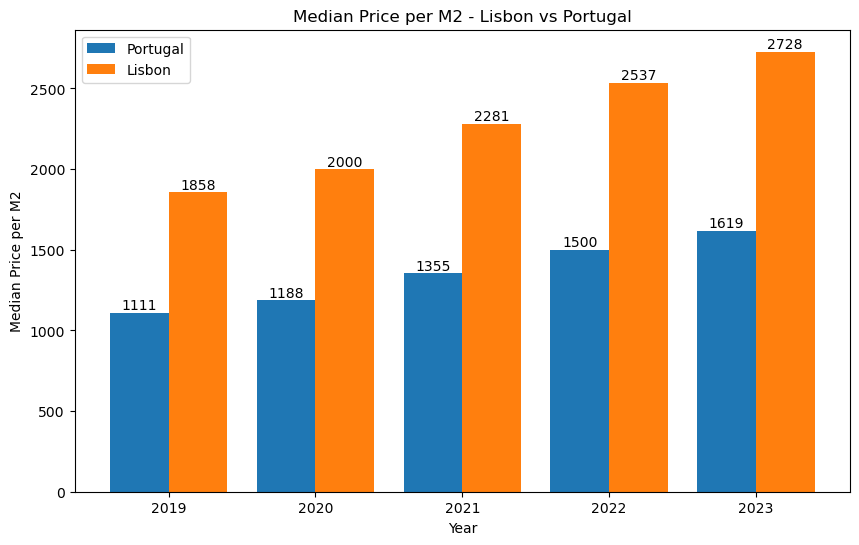

In [94]:
data_ine['Year'] = [int(year) for year in data_ine['Year']]

sorted_data = sorted(zip(data_ine['Year'], data_ine['Median Price per M2 - Lisbon'], data_ine['Median Price per M2 - Portugal']))

years, lisbon_prices, portugal_prices = zip(*sorted_data)

plt.figure(figsize=(10, 6))
bars1 = plt.bar(years, portugal_prices, width=0.4, label='Portugal')
bars2 = plt.bar([int(year) + 0.4 for year in years], lisbon_prices, width=0.4, label='Lisbon')

for bar1, bar2 in zip(bars1, bars2):
    plt.text(bar1.get_x() + bar1.get_width() / 2 , bar1.get_height(), str(int(bar1.get_height())), ha='center', va='bottom')
    plt.text(bar2.get_x() + bar2.get_width() / 2 , bar2.get_height(), str(int(bar2.get_height())), ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Median Price per M2')
plt.title('Median Price per M2 - Lisbon vs Portugal')
plt.xticks([int(year) + 0.2 for year in years], years)
plt.legend()

plt.savefig('Gap_Portugal_Lisbon.png', dpi=200, bbox_inches='tight')
plt.show()

<h1 id = "imports" style="font-size: 30px; color: #5e6670;"><strong>4. Lisbon Properties Final</strong></h1>

In [95]:
selected_columns = ['N_Rooms', 'Price', 'Area_m2', 'Region', 'Typology', 'Type']
selected_columns_1 = ['N_Rooms', 'Price', 'Area_m2', 'Region', 'Typology', 'Type', 'Latitude','Longitude']

data = Lisbon_Properties[selected_columns].copy()
data_1 = Lisbon_Properties[selected_columns_1].copy()

In [96]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
N_Rooms,1312.00,2.30,1.44,0.00,1.00,2.00,3.00,11.00
Price,1312.00,822181.52,803034.54,115000.00,375000.00,579500.00,925500.00,8200000.00
Area_m2,1312.00,121.79,133.97,12.00,61.00,96.00,138.25,3527.00


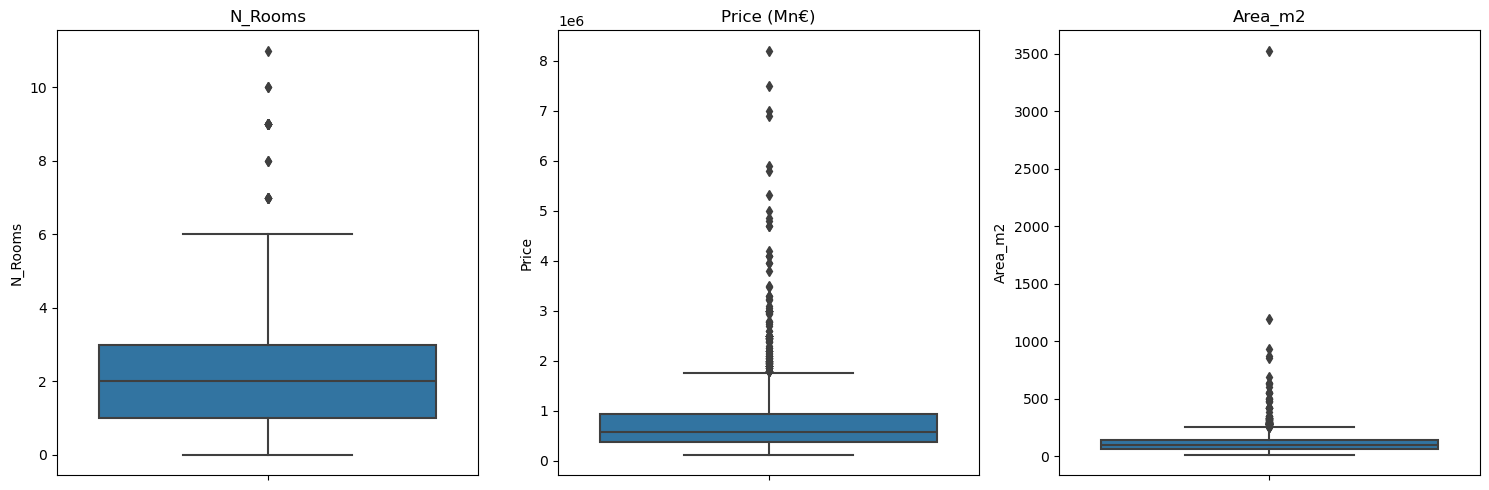

In [97]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(y=data['N_Rooms'], ax=axs[0])
axs[0].set_title('N_Rooms')

sns.boxplot(y=data['Price'], ax=axs[1])
axs[1].set_title('Price (Mn€)')

sns.boxplot(y=data['Area_m2'], ax=axs[2])
axs[2].set_title('Area_m2')

plt.tight_layout()

plt.savefig('boxplots', dpi=200, bbox_inches='tight')
plt.show() 

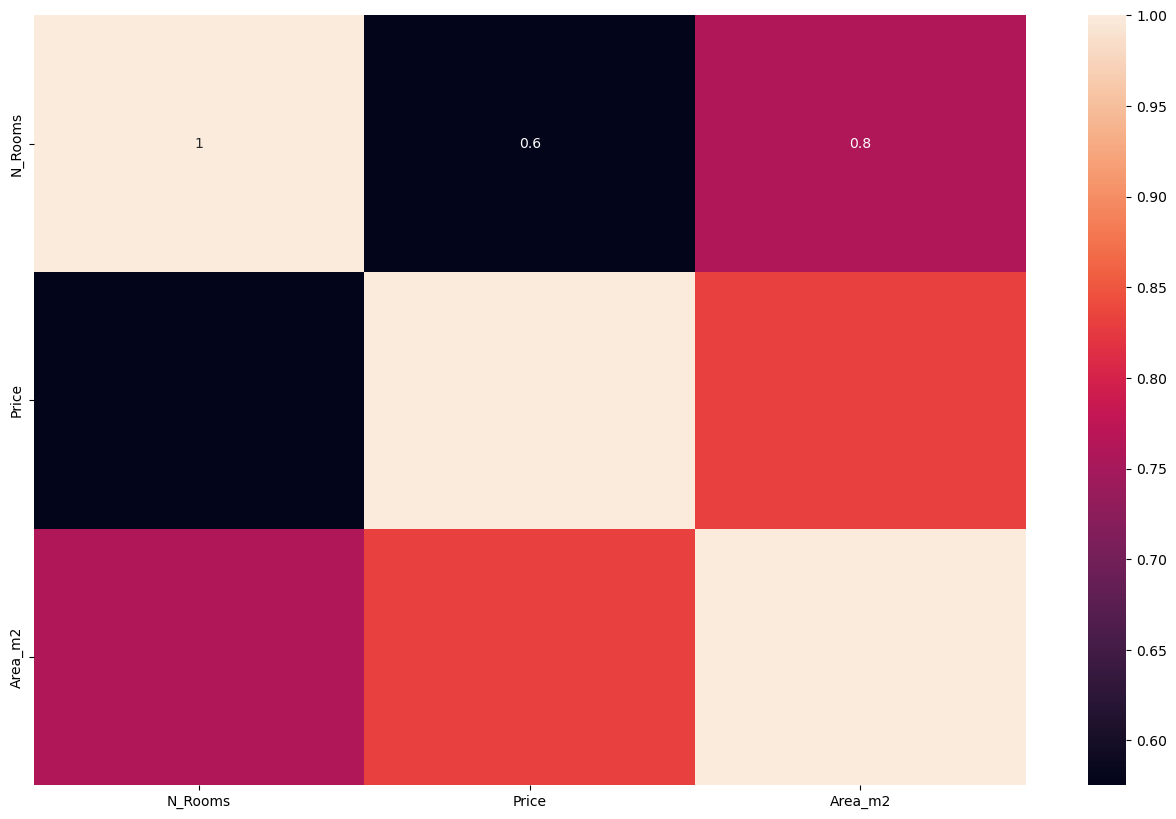

In [98]:
data_numeric = data.select_dtypes(include='number')
data_spearman = data_numeric
data_corr = data_spearman.corr(method='spearman')
figure = plt.figure(figsize=(16,10))
sns.heatmap(data_corr, annot=True, fmt = '.1g')

plt.savefig('correlation_heatmap.png', dpi=200)

In [99]:
data_numeric.corr()

,N_Rooms,Price,Area_m2
N_Rooms,1.00,0.53,0.52
Price,0.53,1.00,0.72
Area_m2,0.52,0.72,1.00


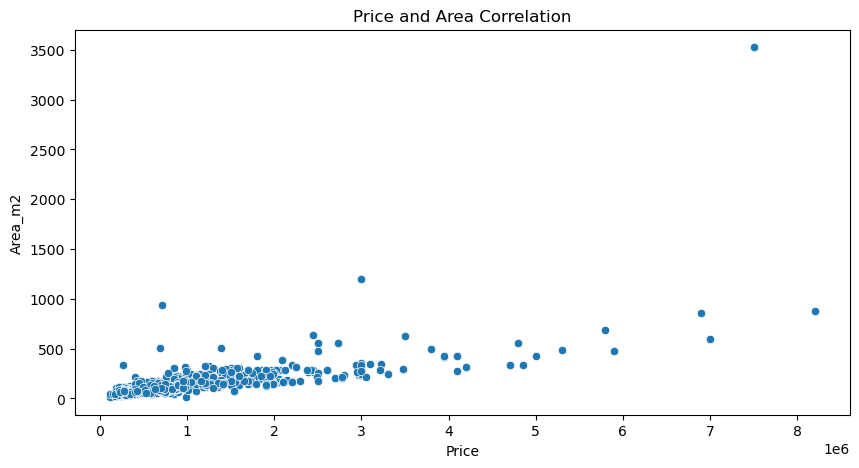

In [100]:
plt.figure(figsize = (10,5))
sns.scatterplot(data=data, x="Price", y="Area_m2")
plt.title('Price and Area Correlation')
plt.show()

In [101]:
average_per_type = data.groupby('Type')['Price'].agg(['mean', 'count'])
pd.options.display.float_format = '{:.2f}'.format
print(average_per_type)

                  mean  count
Type                         
Apartamento  773080.91   1223
Casa         355000.00      2
Duplex       968741.67     24
Estúdio      287842.86      7
Flat         510000.00      1
Loft         731800.00      5
Moradia     1909012.50     40
Palacete    5800000.00      1
Penthouse   1677500.00      8
Quinta      7500000.00      1


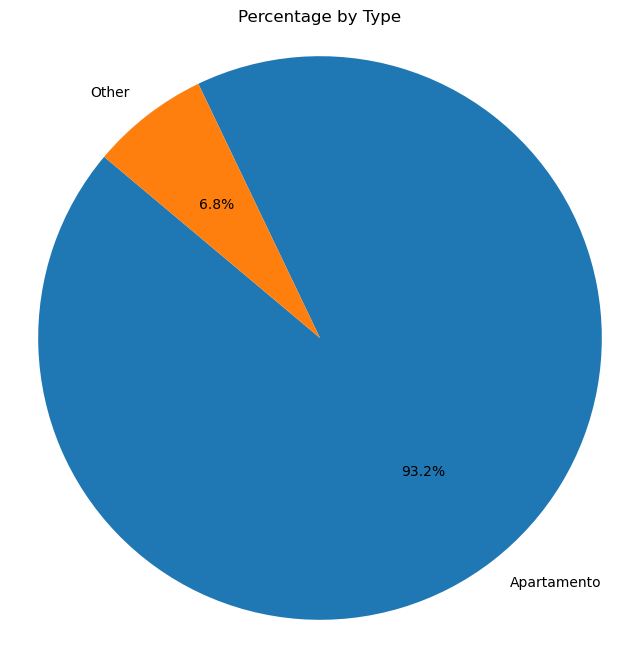

In [102]:
average_per_type['Type'] = average_per_type.index
average_per_type['Grouped_Type'] = average_per_type['Type'].apply(lambda x: x if x == 'Apartamento' else 'Other')
grouped_counts = average_per_type.groupby('Grouped_Type')['count'].sum()

plt.figure(figsize=(8, 8)) 
labels = grouped_counts.index
sizes = grouped_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Percentage by Type')
plt.savefig('type', dpi=200, bbox_inches='tight')

plt.show()

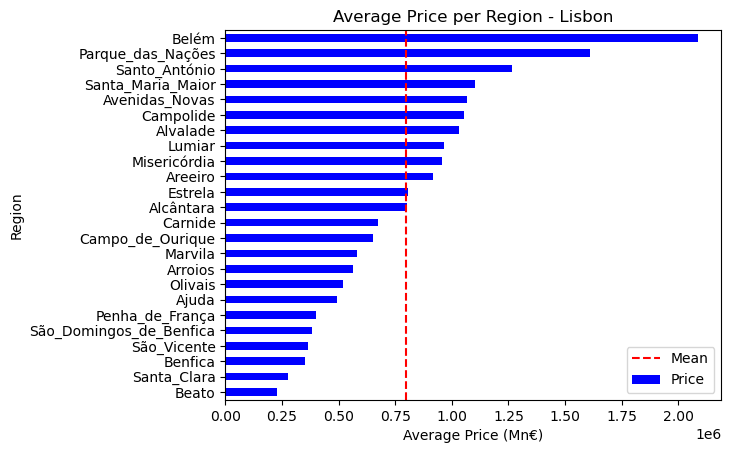

In [103]:
average_per_region_price = data.groupby('Region')['Price'].mean()

average_per_region_price_sorted = average_per_region_price.sort_values(ascending=True)

average_per_region_price_sorted.plot(kind='barh', color='blue')
plt.axvline(x=average_per_region_price_sorted.mean(), color='red', linestyle='--', label='Mean')
plt.xlabel('Average Price (Mn€)')
plt.ylabel('Region')
plt.title('Average Price per Region - Lisbon')
plt.legend()

plt.savefig('average_price_region.png', dpi=200, bbox_inches='tight')
plt.show()

In [104]:
data['Sqr_meter'] = data['Price']/data['Area_m2']
average_per_region = data.groupby('Region')['Sqr_meter'].mean()
median_per_region = data.groupby('Region')['Sqr_meter'].median()

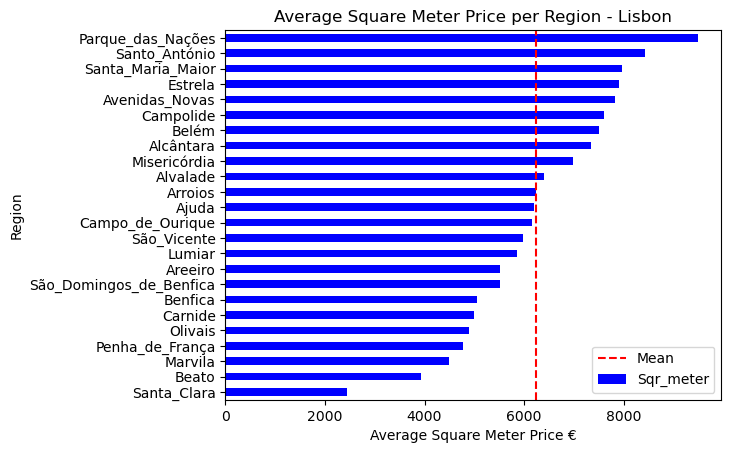

In [105]:
average_per_region_sorted = average_per_region.sort_values(ascending=True)

average_per_region_sorted.plot(kind='barh', color='blue')
plt.axvline(x=average_per_region_sorted.mean(), color='red', linestyle='--', label='Mean')
plt.xlabel('Average Square Meter Price €')
plt.ylabel('Region')
plt.title('Average Square Meter Price per Region - Lisbon')
plt.legend()

plt.savefig('average_price_sqr_region.png', dpi=200, bbox_inches='tight')
plt.show()

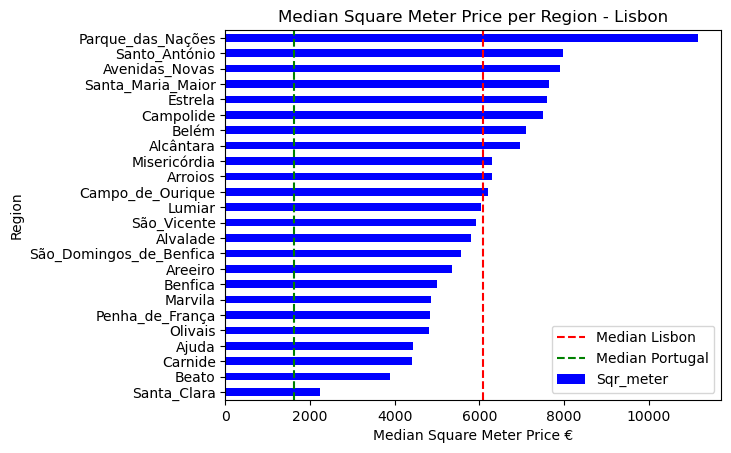

In [106]:
median_per_region_sorted = median_per_region.sort_values(ascending=True)
median_portugal = 1619 #INE data

median_per_region_sorted.plot(kind='barh', color='blue')
plt.axvline(x=median_per_region_sorted.mean(), color='red', linestyle='--', label='Median Lisbon')
plt.axvline(x=median_portugal, color='green', linestyle='--', label='Median Portugal')
plt.xlabel('Median Square Meter Price €')
plt.ylabel('Region')
plt.title('Median Square Meter Price per Region - Lisbon')
plt.legend()

plt.savefig('median_price_sqr_region.png', dpi=200, bbox_inches='tight')
plt.show()

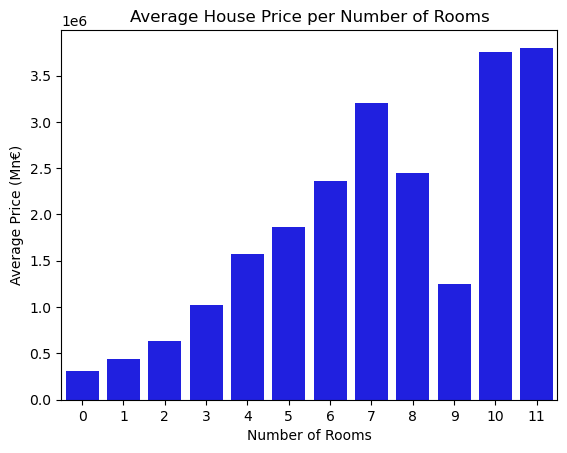

In [107]:
avg_price_per_room = data.groupby('N_Rooms')['Price'].mean().reset_index()
ax = sns.barplot(x='N_Rooms', y='Price', data=avg_price_per_room, color='blue')

plt.title('Average House Price per Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Average Price (Mn€)')

plt.savefig('average_price_per_room.png', dpi=200, bbox_inches='tight')

plt.show()

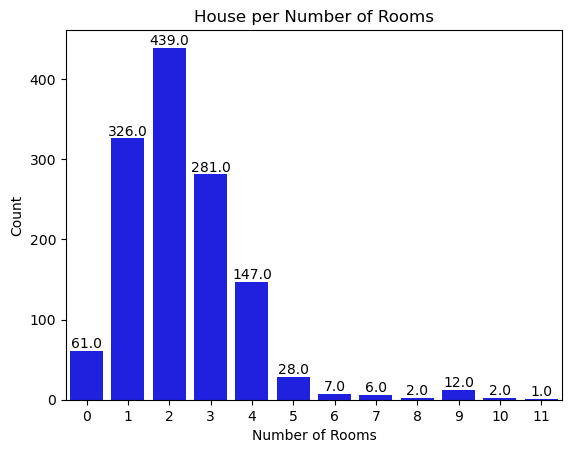

In [108]:
ax = sns.countplot(x='N_Rooms', data=data, color='blue')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

total_count = data['Price'].mean()

plt.title(f'House per Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Count')

plt.savefig('rooms_price.png', dpi=200, bbox_inches='tight')

# Show the plot
plt.show()

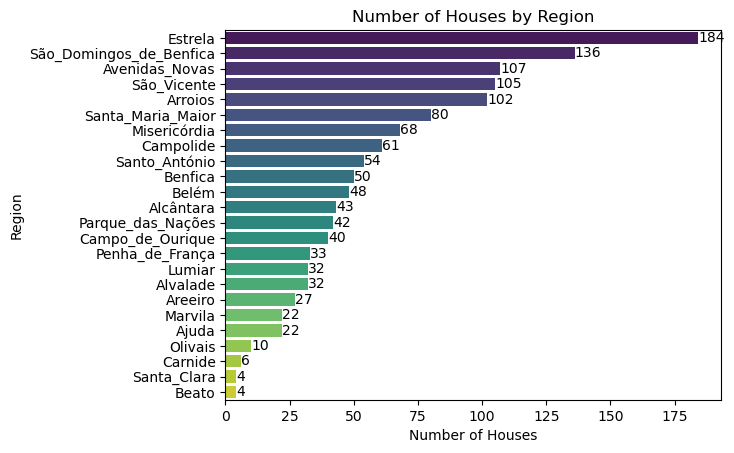

In [109]:
region_counts = data['Region'].value_counts()

sorted_regions = region_counts.index.tolist()

sns.countplot(y='Region', data=data, order=sorted_regions, palette='viridis')

for i, count in enumerate(region_counts[sorted_regions]):
    plt.text(count + 0.1, i, str(count), va='center')

plt.xlabel('Number of Houses')
plt.ylabel('Region')
plt.title('Number of Houses by Region')

plt.savefig('houses_region.png', dpi=200, bbox_inches='tight')

plt.show()

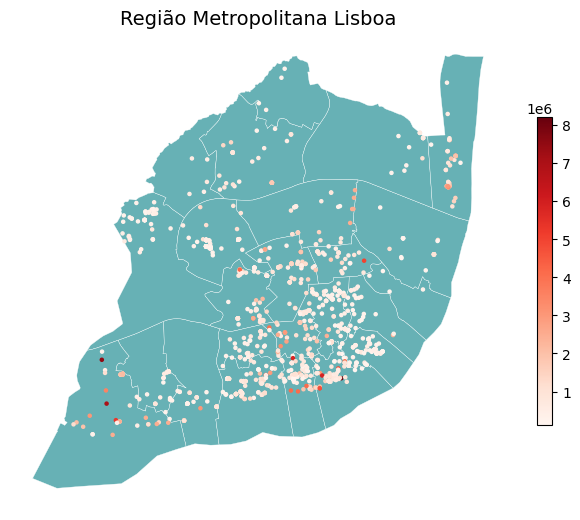

In [110]:
url = 'https://mapas.ine.pt/download/filesGPG/2021/municipios/BGRI2021_1106.zip'
filename = 'BGRI2021_1106.gpkg'

r = requests.get(url)
r.raise_for_status()  
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()  

lisbon = gpd.read_file(filename)

census_col = [x for x in lisbon.columns.to_list() if x.startswith('N_')]

lisbon_neighborhood = lisbon[census_col + ['DTMNFR21', 'geometry']].dissolve(by='DTMNFR21', aggfunc='sum').reset_index()

data_1['geometry'] = data_1.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

points_gdf = gpd.GeoDataFrame(data_1, geometry='geometry', crs="EPSG:4326")

points_gdf = points_gdf.to_crs(epsg=3763)

fig, ax = plt.subplots(figsize=(8, 8))

lisbon_neighborhood.plot(aspect=1,
                         edgecolor="white",
                         linewidth=0.25,
                         color='#67B1B5',
                         ax=ax)

points_gdf.plot(ax=ax, column='Price', cmap='Reds',legend_kwds={'shrink': 0.5},markersize=5, legend=True)

ax.set_title('Região Metropolitana Lisboa', fontsize=14)

ax.axis('off')

plt.show()

<h1 id = "imports" style="font-size: 30px; color: #5e6670;"><strong>5. Metro Final</strong></h1>

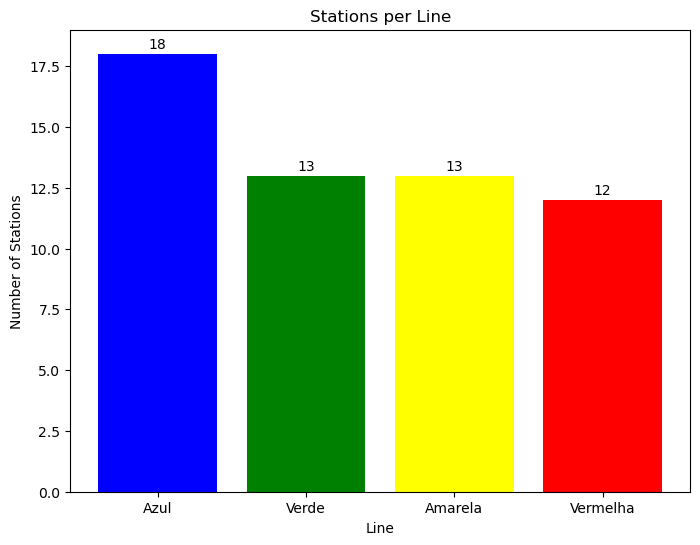

In [111]:
value_counts = Lisbon_Metro['Linha'].value_counts()

colors = ['blue', 'green', 'yellow', 'red']

plt.figure(figsize=(8, 6))
bars = plt.bar(value_counts.index, value_counts.values, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')

# Customize the plot
plt.title('Stations per Line')
plt.xlabel('Line')
plt.ylabel('Number of Stations')
plt.xticks(rotation=0)  
plt.ylim(0, max(value_counts.values) + 1) 

plt.show()

<h1 id = "imports" style="font-size: 30px; color: #5e6670;"><strong>6. Lisbon Culture Final</strong></h1>

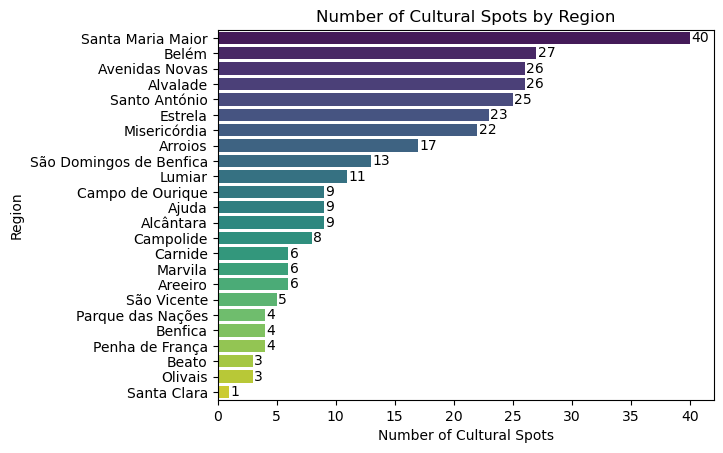

In [112]:
region_counts_1 = Lisbon_Culture['FREGUESIA'].value_counts()

sorted_regions_1 = region_counts_1.index.tolist()

sns.countplot(y='FREGUESIA', data=Lisbon_Culture, order=sorted_regions_1, palette='viridis')

for i, count in enumerate(region_counts_1[sorted_regions_1]):
    plt.text(count + 0.1, i, str(count), va='center')

plt.xlabel('Number of Cultural Spots')
plt.ylabel('Region')
plt.title('Number of Cultural Spots by Region')

plt.savefig('culture_region.png', dpi=200, bbox_inches='tight')

plt.show()

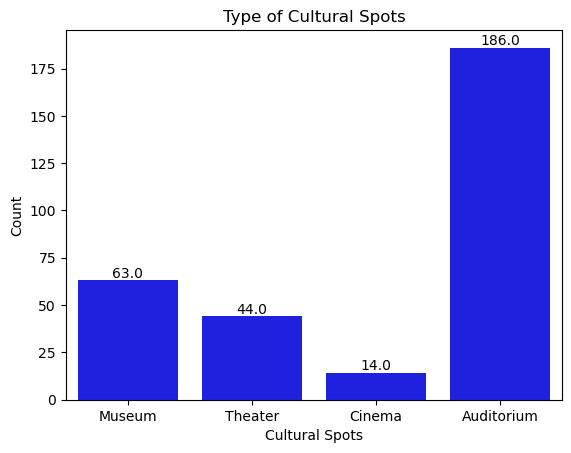

In [113]:
ax = sns.countplot(x='Type', data=Lisbon_Culture, color='blue')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

total_count_1 = Lisbon_Culture['Type'].count()

plt.title(f'Type of Cultural Spots')
plt.xlabel('Cultural Spots')
plt.ylabel('Count')

plt.savefig('cultural_count.png', dpi=200, bbox_inches='tight')
plt.show()

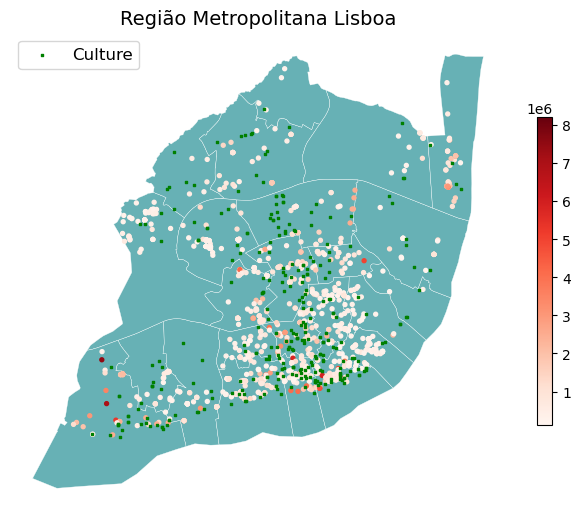

In [114]:
Lisbon_Culture['geometry'] = Lisbon_Culture.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

points_gdf_2 = gpd.GeoDataFrame(Lisbon_Culture, geometry='geometry', crs="EPSG:4326")

points_gdf_2 = points_gdf_2.to_crs(epsg=3763)

fig, ax = plt.subplots(figsize=(8, 8))

lisbon_neighborhood.plot(aspect=1,
                         edgecolor="white",
                         linewidth=0.25,
                         color='#67B1B5',
                         ax=ax)

points_gdf.plot(ax=ax, column='Price', cmap='Reds',legend_kwds={'shrink': 0.5},markersize=8, legend=True)

points_gdf_2.plot(ax=ax, color='green', marker='s', markersize=1, label='Culture')

ax.set_title('Região Metropolitana Lisboa', fontsize=14)

ax.legend(loc='upper left', fontsize=12)

ax.axis('off')

plt.show()

<h1 id = "imports" style="font-size: 30px; color: #5e6670;"><strong>7. Lisbon Education Final</strong></h1>

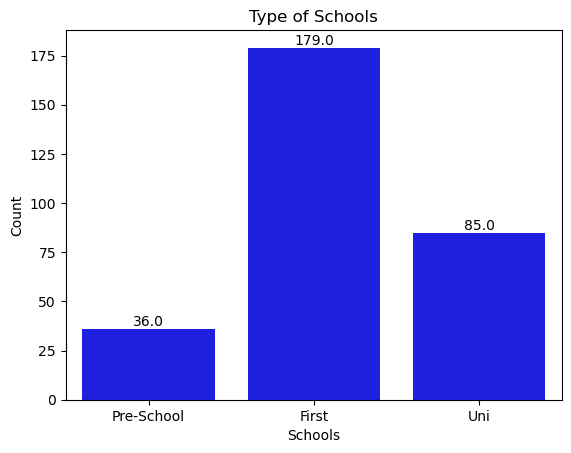

In [115]:
ax = sns.countplot(x='Stage', data=Lisbon_Education, color='blue')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

total_count_3 = Lisbon_Education['Stage'].count()

plt.title(f'Type of Schools')
plt.xlabel('Schools')
plt.ylabel('Count')

plt.savefig('schools_count.png', dpi=200, bbox_inches='tight')

plt.show()

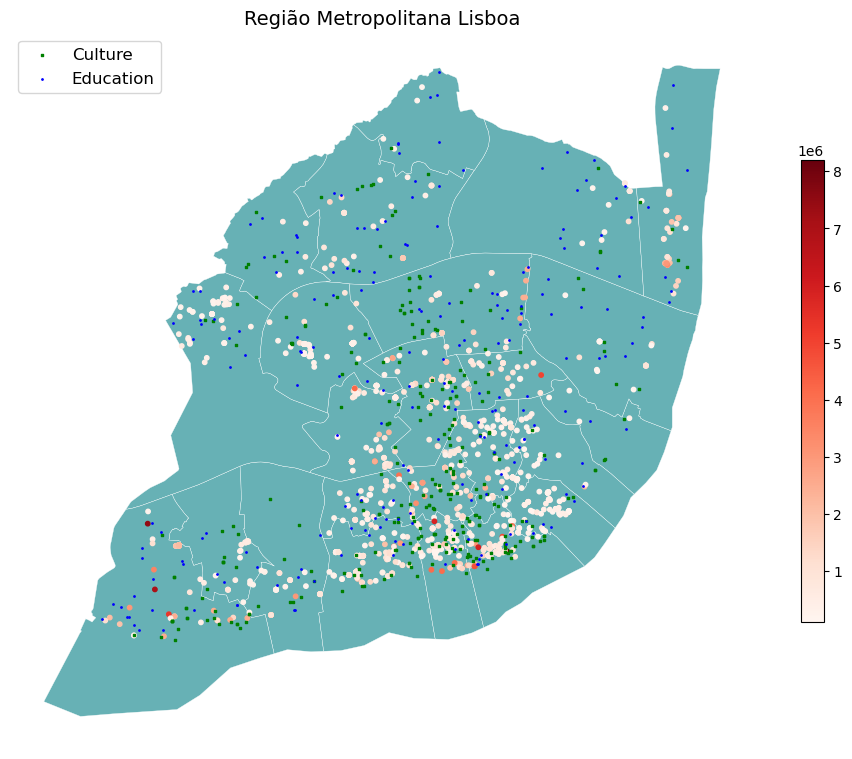

In [116]:
#tirar blanks na area

Lisbon_Education_1 = Lisbon_Education.dropna(subset=['Area'])

Lisbon_Education_1['geometry'] = Lisbon_Education_1.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

points_gdf_3 = gpd.GeoDataFrame(Lisbon_Education_1, geometry='geometry', crs="EPSG:4326")

points_gdf_3 = points_gdf_3.to_crs(epsg=3763)

fig, ax = plt.subplots(figsize=(12, 12))

lisbon_neighborhood.plot(aspect=1,
                         edgecolor="white",
                         linewidth=0.25,
                         color='#67B1B5',
                         ax=ax)


points_gdf.plot(ax=ax, column='Price', cmap='Reds',legend_kwds={'shrink': 0.5},markersize=10, legend=True)

points_gdf_2.plot(ax=ax, color='green', marker='s', markersize=1, label='Culture')

points_gdf_3.plot(ax=ax, color='blue', marker='o', markersize=1, label='Education')

ax.set_title('Região Metropolitana Lisboa', fontsize=14)

ax.legend(loc='upper left', fontsize=12)

ax.axis('off')

plt.savefig('Distribution_all', dpi=200, bbox_inches='tight')

plt.show()